# Used Car Price Prediction Project


With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
cars=pd.read_csv('carsdata.csv')

In [3]:
cars

,Unnamed: 0,Brands,Model,Variant,Make Year,Fuel,Transmission,Driven Kilometers,Owners,Location,Price
0,0,hyundai,Hyundai Grand i10,MAGNA 1.2 VTVT,2014,Petrol,Manual,"38,708",1,bengaluru,"3,82,299"
1,1,hyundai,Hyundai Elite i20,ASTA 1.4 CRDI,2016,Diesel,Manual,"43,221",2,bengaluru,"6,83,299"
2,2,hyundai,Hyundai Elite i20,ASTA 1.2 (O),2015,Petrol,Manual,"53,045",1,bengaluru,"6,58,599"
3,3,hyundai,Hyundai Creta,1.6 VTVT SX AUTO,2019,Petrol,Automatic,"12,493",1,bengaluru,"14,86,399"
4,4,hyundai,Hyundai Elite i20,1.4 CRDI ASTA (O),2017,Diesel,Manual,"1,00,703",1,bengaluru,"7,30,199"
...,...,...,...,...,...,...,...,...,...,...,...
4372,4372,ford,Ford Ecosport,1.5 TREND TDCI,2018,Diesel,Manual,"34,586",1,chandigarh,"7,59,899"
4373,4373,ford,Ford Ecosport,1.5 TREND TDCI,2018,Diesel,Manual,"46,128",1,chandigarh,"8,21,299"
4374,4374,ford,Ford FREESTYLE,TITANIUM 1.5 TDCI,2018,Diesel,Manual,"75,456",1,chandigarh,"5,48,899"
4375,4375,ford,Ford Endeavour,2.2l 4X4 MT Trend,2016,Diesel,Manual,"45,927",1,chandigarh,"19,61,999"


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4377 non-null   int64 
 1   Brands             4377 non-null   object
 2   Model              4377 non-null   object
 3   Variant            4377 non-null   object
 4   Make Year          4377 non-null   int64 
 5   Fuel               4377 non-null   object
 6   Transmission       4206 non-null   object
 7   Driven Kilometers  4377 non-null   object
 8   Owners             4377 non-null   int64 
 9   Location           4377 non-null   object
 10  Price              4377 non-null   object
dtypes: int64(3), object(8)
memory usage: 376.3+ KB


Feature description
1. Brands
Name of the company car belongs to

2. Model
Name of the car model

3. Variant
Model variant the car has

4. Make year
The year car was made

5. Fuel
Type of fuel the car used

6. Transmission
Whether the car has automatic or manual transmission

7. Driven kilometers
Number of kilometers the car has run

8. Owners
Number of owners the car has been sold to

9. Location
Location from the used car belongs to

10. Price
This is our traget variable which we needs to predict, the price of the car

Lets observe each columns and understand the cleaning required on the dataset

In [5]:
cars['Brands'].unique()

array(['hyundai', 'renault', 'mahindra', 'toyota', 'audi', 'honda',
       'maruti', 'tata', 'ford', 'skoda'], dtype=object)

In [6]:
cars['Model'].unique()

array(['Hyundai Grand i10', 'Hyundai Elite i20', 'Hyundai Creta',
       'Hyundai NEW SANTRO', 'Hyundai Santro Xing', 'Hyundai i20',
       'Hyundai i10', 'Hyundai Eon', 'Hyundai VENUE', 'Hyundai Verna',
       'Hyundai Tucson New', 'Hyundai i20 Active',
       'Hyundai GRAND I10 NIOS', 'Renault Duster', 'Renault TRIBER',
       'Renault Kwid', 'Mahindra XUV500', 'Mahindra Scorpio',
       'Mahindra Kuv100', 'Toyota Etios Liva', 'Toyota YARIS',
       'Toyota Innova', 'Toyota Corolla Altis', 'Toyota Glanza',
       'Audi A3', 'Honda Brio', 'Honda Jazz', 'Honda Amaze', 'Honda City',
       'Honda Mobilio', 'Honda WR-V', 'Maruti Alto K10', 'Maruti Baleno',
       'Maruti Swift', 'Maruti Dzire', 'Maruti IGNIS',
       'Maruti Vitara Brezza', 'Maruti Celerio', 'Maruti Swift Dzire',
       'Maruti S PRESSO', 'Maruti Wagon R 1.0', 'Maruti Eeco',
       'Maruti Alto 800', 'Maruti Ciaz', 'Maruti Ertiga',
       'Maruti Zen Estilo', 'Maruti Alto', 'Maruti Ritz', 'Maruti OMNI E',
       'Tata Ti

In [7]:
cars['Variant'].value_counts()

VXI                                     552
LXI                                     317
DELTA 1.2 K12                           178
VDI                                     158
VXI AMT                                  90
                                       ... 
GL                                        1
1.5 TITANIUM PLATINUM EDITION DIESEL      1
SX+ AT 1.2CRDI                            1
LXI 1.0 L                                 1
SPORTIVO 4X2 MT                           1
Name: Variant, Length: 494, dtype: int64

In [8]:
cars['Make Year'].unique()

array([2014, 2016, 2015, 2019, 2017, 2011, 2013, 2012, 2010, 2009, 2020,
       2018, 2008, 2021], dtype=int64)

In [9]:
cars['Fuel'].unique()

array(['Petrol', 'Diesel', 'Petrol + LPG', 'Petrol + CNG'], dtype=object)

Fuel requies cleaning as some of the data has Petrol + LPG or CNG we will remove the petrol + as and change LPG to CNG

In [10]:
cars['Transmission'].unique()

array(['Manual', 'Automatic', nan], dtype=object)

There are some Nan values in Transmission which needs to be treated

In [11]:
cars['Driven Kilometers'].value_counts()

31,550    4
75,162    4
14,908    4
14,604    4
30,601    4
         ..
44,296    1
37,695    1
48,732    1
83,163    1
4,835     1
Name: Driven Kilometers, Length: 3359, dtype: int64

Although every columns has unique values but driven kilometer is an important feature for our machine to understand

In [13]:
cars['Owners'].unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
cars['Location'].unique()

array(['bengaluru', 'chennai', 'new-delhi', 'mumbai', 'pune', 'hyderabad',
       'kolkata', 'ahmedabad', 'jaipur', 'chandigarh'], dtype=object)

In [15]:
cars['Price'].unique()

array(['3,82,299', '6,83,299', '6,58,599', ..., '8,21,299', '19,61,999',
       '5,02,299'], dtype=object)

In [16]:
#Lets check for null values
cars.isnull().sum()

Unnamed: 0             0
Brands                 0
Model                  0
Variant                0
Make Year              0
Fuel                   0
Transmission         171
Driven Kilometers      0
Owners                 0
Location               0
Price                  0
dtype: int64

As observed earlier there are null values in Transmission

Observation:
We need to drop the Unnamed column.
We will reduce the length of Variant. It will be easy for our machine to understand
Remove 'Petrol+' and change LPG to CNG as it is same fuel
Treat the Null values in Transmission
Remove commas from Driven kilometers and covert it to integer
Remove commas from Price and convert it to integer

In [17]:
#Dropping the Unnamed columns
cars.drop(['Unnamed: 0'],axis=1,inplace=True)

In [18]:
cars[cars['Transmission'].isnull()]

,Brands,Model,Variant,Make Year,Fuel,Transmission,Driven Kilometers,Owners,Location,Price
18,hyundai,Hyundai NEW SANTRO,1.1 MAGNA MT,2019,Petrol,NaN,"10,782",1,bengaluru,"5,67,699"
21,hyundai,Hyundai Verna,FLUIDIC 1.4 VTVT CX,2014,Petrol,NaN,"44,336",1,bengaluru,"6,05,099"
97,renault,Renault TRIBER,1.0 RXT,2019,Petrol,NaN,"28,512",2,bengaluru,"6,48,199"
98,renault,Renault Kwid,RXL1.0 EASY-R AT,2017,Petrol,NaN,"26,371",1,bengaluru,"4,55,199"
103,renault,Renault Kwid,RXT 1.0 EASY-R AT,2016,Petrol,NaN,"35,941",2,bengaluru,"3,60,399"
...,...,...,...,...,...,...,...,...,...,...
4224,mahindra,Mahindra MARAZZO,M2 8 STR,2019,Diesel,NaN,"81,059",2,chandigarh,"7,12,499"
4236,audi,Audi A4,2.0 TDI S LINE,2014,Diesel,NaN,"57,485",1,chandigarh,"12,96,599"
4242,maruti,Maruti New Wagon-R,ZXI 1.2,2019,Petrol,NaN,"7,983",2,chandigarh,"5,36,699"
4263,maruti,Maruti Alto K10,VXI AMT,2016,Petrol,NaN,"85,161",3,chandigarh,"3,53,999"


In [19]:
#Since we require minimum 4000 data, we will drop the nan values
cars=cars.dropna()

In [20]:
cars

,Brands,Model,Variant,Make Year,Fuel,Transmission,Driven Kilometers,Owners,Location,Price
0,hyundai,Hyundai Grand i10,MAGNA 1.2 VTVT,2014,Petrol,Manual,"38,708",1,bengaluru,"3,82,299"
1,hyundai,Hyundai Elite i20,ASTA 1.4 CRDI,2016,Diesel,Manual,"43,221",2,bengaluru,"6,83,299"
2,hyundai,Hyundai Elite i20,ASTA 1.2 (O),2015,Petrol,Manual,"53,045",1,bengaluru,"6,58,599"
3,hyundai,Hyundai Creta,1.6 VTVT SX AUTO,2019,Petrol,Automatic,"12,493",1,bengaluru,"14,86,399"
4,hyundai,Hyundai Elite i20,1.4 CRDI ASTA (O),2017,Diesel,Manual,"1,00,703",1,bengaluru,"7,30,199"
...,...,...,...,...,...,...,...,...,...,...
4372,ford,Ford Ecosport,1.5 TREND TDCI,2018,Diesel,Manual,"34,586",1,chandigarh,"7,59,899"
4373,ford,Ford Ecosport,1.5 TREND TDCI,2018,Diesel,Manual,"46,128",1,chandigarh,"8,21,299"
4374,ford,Ford FREESTYLE,TITANIUM 1.5 TDCI,2018,Diesel,Manual,"75,456",1,chandigarh,"5,48,899"
4375,ford,Ford Endeavour,2.2l 4X4 MT Trend,2016,Diesel,Manual,"45,927",1,chandigarh,"19,61,999"


In [21]:
#Lets check for null values
cars.isnull().sum()

Brands               0
Model                0
Variant              0
Make Year            0
Fuel                 0
Transmission         0
Driven Kilometers    0
Owners               0
Location             0
Price                0
dtype: int64

In [22]:
#the first name in the model is the brand name, hence we will remove the brand name from Model
cars['Model'].unique()

array(['Hyundai Grand i10', 'Hyundai Elite i20', 'Hyundai Creta',
       'Hyundai NEW SANTRO', 'Hyundai Santro Xing', 'Hyundai i20',
       'Hyundai i10', 'Hyundai Eon', 'Hyundai VENUE', 'Hyundai Verna',
       'Hyundai Tucson New', 'Hyundai i20 Active',
       'Hyundai GRAND I10 NIOS', 'Renault Duster', 'Renault Kwid',
       'Renault TRIBER', 'Mahindra XUV500', 'Mahindra Scorpio',
       'Mahindra Kuv100', 'Toyota Etios Liva', 'Toyota YARIS',
       'Toyota Innova', 'Toyota Corolla Altis', 'Toyota Glanza',
       'Audi A3', 'Honda Brio', 'Honda Jazz', 'Honda Amaze', 'Honda City',
       'Honda Mobilio', 'Honda WR-V', 'Maruti Alto K10', 'Maruti Baleno',
       'Maruti Swift', 'Maruti Dzire', 'Maruti IGNIS',
       'Maruti Vitara Brezza', 'Maruti Celerio', 'Maruti Swift Dzire',
       'Maruti S PRESSO', 'Maruti Wagon R 1.0', 'Maruti Eeco',
       'Maruti Alto 800', 'Maruti Ciaz', 'Maruti Ertiga',
       'Maruti Zen Estilo', 'Maruti Alto', 'Maruti Ritz', 'Tata Tiago',
       'Tata NEXON

In [23]:
cars['Model']=cars['Model'].str.split(" ").str.slice(1,3).str.join(' ')

In [24]:
cars

,Brands,Model,Variant,Make Year,Fuel,Transmission,Driven Kilometers,Owners,Location,Price
0,hyundai,Grand i10,MAGNA 1.2 VTVT,2014,Petrol,Manual,"38,708",1,bengaluru,"3,82,299"
1,hyundai,Elite i20,ASTA 1.4 CRDI,2016,Diesel,Manual,"43,221",2,bengaluru,"6,83,299"
2,hyundai,Elite i20,ASTA 1.2 (O),2015,Petrol,Manual,"53,045",1,bengaluru,"6,58,599"
3,hyundai,Creta,1.6 VTVT SX AUTO,2019,Petrol,Automatic,"12,493",1,bengaluru,"14,86,399"
4,hyundai,Elite i20,1.4 CRDI ASTA (O),2017,Diesel,Manual,"1,00,703",1,bengaluru,"7,30,199"
...,...,...,...,...,...,...,...,...,...,...
4372,ford,Ecosport,1.5 TREND TDCI,2018,Diesel,Manual,"34,586",1,chandigarh,"7,59,899"
4373,ford,Ecosport,1.5 TREND TDCI,2018,Diesel,Manual,"46,128",1,chandigarh,"8,21,299"
4374,ford,FREESTYLE,TITANIUM 1.5 TDCI,2018,Diesel,Manual,"75,456",1,chandigarh,"5,48,899"
4375,ford,Endeavour,2.2l 4X4 MT Trend,2016,Diesel,Manual,"45,927",1,chandigarh,"19,61,999"


In [25]:
#we will shorter the variant name only upto 2 words
cars['Variant']=cars['Variant'].str.split(" ").str.slice(0,2).str.join(' ')

In [26]:
cars

,Brands,Model,Variant,Make Year,Fuel,Transmission,Driven Kilometers,Owners,Location,Price
0,hyundai,Grand i10,MAGNA 1.2,2014,Petrol,Manual,"38,708",1,bengaluru,"3,82,299"
1,hyundai,Elite i20,ASTA 1.4,2016,Diesel,Manual,"43,221",2,bengaluru,"6,83,299"
2,hyundai,Elite i20,ASTA 1.2,2015,Petrol,Manual,"53,045",1,bengaluru,"6,58,599"
3,hyundai,Creta,1.6 VTVT,2019,Petrol,Automatic,"12,493",1,bengaluru,"14,86,399"
4,hyundai,Elite i20,1.4 CRDI,2017,Diesel,Manual,"1,00,703",1,bengaluru,"7,30,199"
...,...,...,...,...,...,...,...,...,...,...
4372,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,"34,586",1,chandigarh,"7,59,899"
4373,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,"46,128",1,chandigarh,"8,21,299"
4374,ford,FREESTYLE,TITANIUM 1.5,2018,Diesel,Manual,"75,456",1,chandigarh,"5,48,899"
4375,ford,Endeavour,2.2l 4X4,2016,Diesel,Manual,"45,927",1,chandigarh,"19,61,999"


In [27]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4206 entries, 0 to 4376
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brands             4206 non-null   object
 1   Model              4206 non-null   object
 2   Variant            4206 non-null   object
 3   Make Year          4206 non-null   int64 
 4   Fuel               4206 non-null   object
 5   Transmission       4206 non-null   object
 6   Driven Kilometers  4206 non-null   object
 7   Owners             4206 non-null   int64 
 8   Location           4206 non-null   object
 9   Price              4206 non-null   object
dtypes: int64(2), object(8)
memory usage: 361.5+ KB


In [28]:
#now lets clean the fuel column, we will remove the petrol+lpg and petrol+cng both to cng
cars["Fuel"].unique()

array(['Petrol', 'Diesel', 'Petrol + LPG', 'Petrol + CNG'], dtype=object)

In [29]:
cars['Fuel'] = cars['Fuel'].replace(['Petrol + LPG', 'Petrol + CNG'], 'CNG')

In [30]:
cars["Fuel"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [31]:
#now let's remove the commas from driven kilometers
#I will also rename the column
cars.rename(columns = {'Driven Kilometers':'kms'}, inplace = True)

In [32]:
cars

,Brands,Model,Variant,Make Year,Fuel,Transmission,kms,Owners,Location,Price
0,hyundai,Grand i10,MAGNA 1.2,2014,Petrol,Manual,"38,708",1,bengaluru,"3,82,299"
1,hyundai,Elite i20,ASTA 1.4,2016,Diesel,Manual,"43,221",2,bengaluru,"6,83,299"
2,hyundai,Elite i20,ASTA 1.2,2015,Petrol,Manual,"53,045",1,bengaluru,"6,58,599"
3,hyundai,Creta,1.6 VTVT,2019,Petrol,Automatic,"12,493",1,bengaluru,"14,86,399"
4,hyundai,Elite i20,1.4 CRDI,2017,Diesel,Manual,"1,00,703",1,bengaluru,"7,30,199"
...,...,...,...,...,...,...,...,...,...,...
4372,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,"34,586",1,chandigarh,"7,59,899"
4373,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,"46,128",1,chandigarh,"8,21,299"
4374,ford,FREESTYLE,TITANIUM 1.5,2018,Diesel,Manual,"75,456",1,chandigarh,"5,48,899"
4375,ford,Endeavour,2.2l 4X4,2016,Diesel,Manual,"45,927",1,chandigarh,"19,61,999"


In [33]:
cars['kms']=cars['kms'].str.replace(',','').astype(int) #changing it to integer type as well

In [34]:
cars

,Brands,Model,Variant,Make Year,Fuel,Transmission,kms,Owners,Location,Price
0,hyundai,Grand i10,MAGNA 1.2,2014,Petrol,Manual,38708,1,bengaluru,"3,82,299"
1,hyundai,Elite i20,ASTA 1.4,2016,Diesel,Manual,43221,2,bengaluru,"6,83,299"
2,hyundai,Elite i20,ASTA 1.2,2015,Petrol,Manual,53045,1,bengaluru,"6,58,599"
3,hyundai,Creta,1.6 VTVT,2019,Petrol,Automatic,12493,1,bengaluru,"14,86,399"
4,hyundai,Elite i20,1.4 CRDI,2017,Diesel,Manual,100703,1,bengaluru,"7,30,199"
...,...,...,...,...,...,...,...,...,...,...
4372,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,34586,1,chandigarh,"7,59,899"
4373,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,46128,1,chandigarh,"8,21,299"
4374,ford,FREESTYLE,TITANIUM 1.5,2018,Diesel,Manual,75456,1,chandigarh,"5,48,899"
4375,ford,Endeavour,2.2l 4X4,2016,Diesel,Manual,45927,1,chandigarh,"19,61,999"


In [35]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4206 entries, 0 to 4376
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brands        4206 non-null   object
 1   Model         4206 non-null   object
 2   Variant       4206 non-null   object
 3   Make Year     4206 non-null   int64 
 4   Fuel          4206 non-null   object
 5   Transmission  4206 non-null   object
 6   kms           4206 non-null   int32 
 7   Owners        4206 non-null   int64 
 8   Location      4206 non-null   object
 9   Price         4206 non-null   object
dtypes: int32(1), int64(2), object(7)
memory usage: 345.0+ KB


In [36]:
#we will do the same from price
cars['Price']=cars['Price'].str.replace(',','').astype(int)

In [37]:
cars

,Brands,Model,Variant,Make Year,Fuel,Transmission,kms,Owners,Location,Price
0,hyundai,Grand i10,MAGNA 1.2,2014,Petrol,Manual,38708,1,bengaluru,382299
1,hyundai,Elite i20,ASTA 1.4,2016,Diesel,Manual,43221,2,bengaluru,683299
2,hyundai,Elite i20,ASTA 1.2,2015,Petrol,Manual,53045,1,bengaluru,658599
3,hyundai,Creta,1.6 VTVT,2019,Petrol,Automatic,12493,1,bengaluru,1486399
4,hyundai,Elite i20,1.4 CRDI,2017,Diesel,Manual,100703,1,bengaluru,730199
...,...,...,...,...,...,...,...,...,...,...
4372,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,34586,1,chandigarh,759899
4373,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,46128,1,chandigarh,821299
4374,ford,FREESTYLE,TITANIUM 1.5,2018,Diesel,Manual,75456,1,chandigarh,548899
4375,ford,Endeavour,2.2l 4X4,2016,Diesel,Manual,45927,1,chandigarh,1961999


In [38]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4206 entries, 0 to 4376
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brands        4206 non-null   object
 1   Model         4206 non-null   object
 2   Variant       4206 non-null   object
 3   Make Year     4206 non-null   int64 
 4   Fuel          4206 non-null   object
 5   Transmission  4206 non-null   object
 6   kms           4206 non-null   int32 
 7   Owners        4206 non-null   int64 
 8   Location      4206 non-null   object
 9   Price         4206 non-null   int32 
dtypes: int32(2), int64(2), object(6)
memory usage: 328.6+ KB


In [39]:
#renaming the make year column
cars.rename(columns = {'Make Year':'Year'}, inplace = True)

In [40]:
cars

,Brands,Model,Variant,Year,Fuel,Transmission,kms,Owners,Location,Price
0,hyundai,Grand i10,MAGNA 1.2,2014,Petrol,Manual,38708,1,bengaluru,382299
1,hyundai,Elite i20,ASTA 1.4,2016,Diesel,Manual,43221,2,bengaluru,683299
2,hyundai,Elite i20,ASTA 1.2,2015,Petrol,Manual,53045,1,bengaluru,658599
3,hyundai,Creta,1.6 VTVT,2019,Petrol,Automatic,12493,1,bengaluru,1486399
4,hyundai,Elite i20,1.4 CRDI,2017,Diesel,Manual,100703,1,bengaluru,730199
...,...,...,...,...,...,...,...,...,...,...
4372,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,34586,1,chandigarh,759899
4373,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,46128,1,chandigarh,821299
4374,ford,FREESTYLE,TITANIUM 1.5,2018,Diesel,Manual,75456,1,chandigarh,548899
4375,ford,Endeavour,2.2l 4X4,2016,Diesel,Manual,45927,1,chandigarh,1961999


In [41]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4206 entries, 0 to 4376
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brands        4206 non-null   object
 1   Model         4206 non-null   object
 2   Variant       4206 non-null   object
 3   Year          4206 non-null   int64 
 4   Fuel          4206 non-null   object
 5   Transmission  4206 non-null   object
 6   kms           4206 non-null   int32 
 7   Owners        4206 non-null   int64 
 8   Location      4206 non-null   object
 9   Price         4206 non-null   int32 
dtypes: int32(2), int64(2), object(6)
memory usage: 328.6+ KB


In [42]:
cars.describe()

,Year,kms,Owners,Price
count,4206.000000,4206.000000,4206.000000,4.206000e+03
mean,2016.464337,45472.650024,1.201379,5.864452e+05
std,2.249172,34955.709385,0.449714,2.682182e+05
min,2008.000000,58.000000,1.000000,1.263990e+05
25%,2015.000000,20382.500000,1.000000,4.016240e+05
50%,2017.000000,36986.500000,1.000000,5.305990e+05
75%,2018.000000,62474.250000,1.000000,7.058490e+05
max,2021.000000,276914.000000,4.000000,2.760299e+06


Observation

Used cars are available from year 2008 to 2021.

We have a car which has 276914 kms driven we need to check on that as it is very high

<AxesSubplot:xlabel='Price', ylabel='Density'>

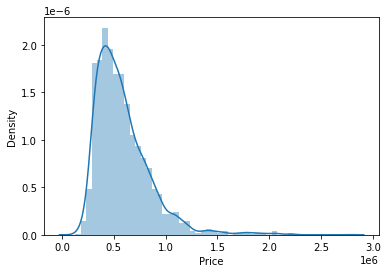

In [43]:
sns.distplot(cars['Price'])

<AxesSubplot:xlabel='kms', ylabel='Density'>

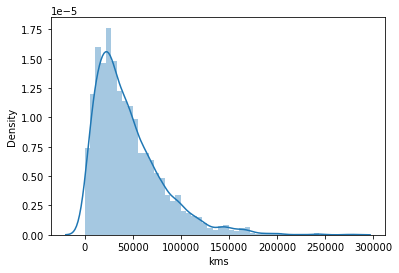

In [44]:
sns.distplot(cars['kms'])

Kms is highly skewed. Let's see the data

In [45]:
cars[cars['kms']>200000]

,Brands,Model,Variant,Year,Fuel,Transmission,kms,Owners,Location,Price
126,toyota,Innova,2.5 V,2009,Diesel,Manual,204940,2,bengaluru,784099
517,toyota,Innova,2.5 VX,2013,Diesel,Manual,221916,1,chennai,912499
1725,toyota,Fortuner,3.0 MT,2015,Diesel,Manual,276914,1,mumbai,1382699
2154,maruti,Ertiga,VDI ABS,2012,Diesel,Manual,242900,1,mumbai,531699
2611,toyota,Fortuner,3.0 MT,2015,Diesel,Manual,276914,1,pune,1382699
2717,maruti,Ertiga,VDI ABS,2012,Diesel,Manual,242900,1,pune,531699
3332,maruti,Baleno,ZETA DDIS,2016,Diesel,Manual,201104,1,hyderabad,535899
3455,maruti,Baleno,ZETA DDIS,2016,Diesel,Manual,201104,1,kolkata,535899
3472,hyundai,Creta,1.4 E,2018,Diesel,Manual,241497,1,ahmedabad,822999
3914,toyota,Innova,2.5 GX,2012,Diesel,Manual,201883,2,jaipur,673599


The data is very less if kms driven is above 200000 kms. We will drop this columns

In [46]:
cars.drop(cars[cars.kms > 200000].index, inplace=True)

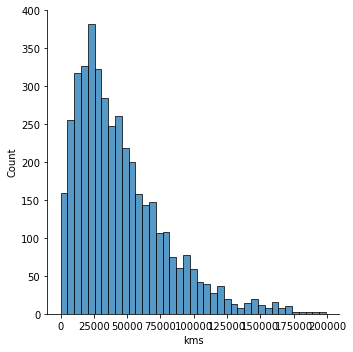

In [47]:
sns.displot(cars['kms'])

The skewness has been reduced a lot

<AxesSubplot:xlabel='Owners', ylabel='Count'>

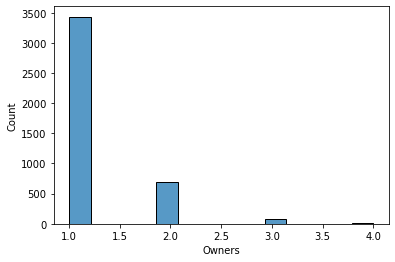

In [48]:
sns.histplot(cars['Owners'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

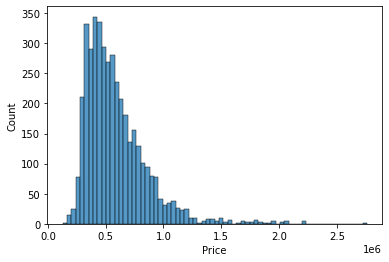

In [49]:
sns.histplot(cars['Price'])

In [50]:
cars

,Brands,Model,Variant,Year,Fuel,Transmission,kms,Owners,Location,Price
0,hyundai,Grand i10,MAGNA 1.2,2014,Petrol,Manual,38708,1,bengaluru,382299
1,hyundai,Elite i20,ASTA 1.4,2016,Diesel,Manual,43221,2,bengaluru,683299
2,hyundai,Elite i20,ASTA 1.2,2015,Petrol,Manual,53045,1,bengaluru,658599
3,hyundai,Creta,1.6 VTVT,2019,Petrol,Automatic,12493,1,bengaluru,1486399
4,hyundai,Elite i20,1.4 CRDI,2017,Diesel,Manual,100703,1,bengaluru,730199
...,...,...,...,...,...,...,...,...,...,...
4372,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,34586,1,chandigarh,759899
4373,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,46128,1,chandigarh,821299
4374,ford,FREESTYLE,TITANIUM 1.5,2018,Diesel,Manual,75456,1,chandigarh,548899
4375,ford,Endeavour,2.2l 4X4,2016,Diesel,Manual,45927,1,chandigarh,1961999


<AxesSubplot:>

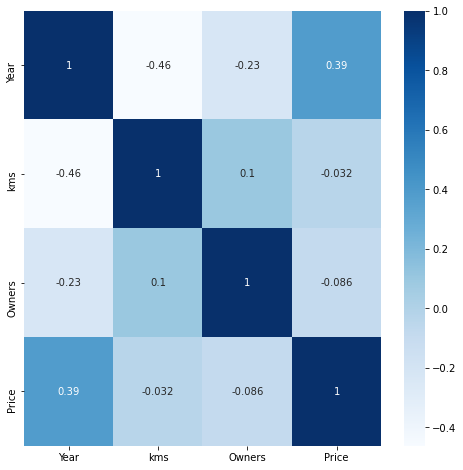

In [51]:
corr=cars.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cars.corr(),annot=True,cmap='Blues')

# Visualization

<AxesSubplot:ylabel='Brands'>

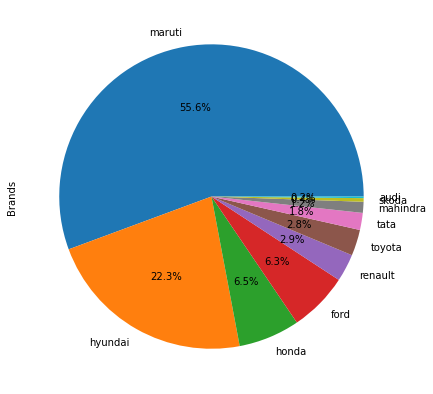

In [52]:
cars['Brands'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

55.6% percent of the data is from Maruti Brand followed by Hyundai

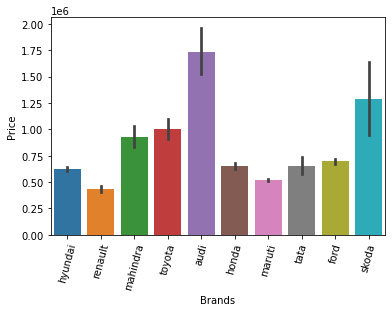

In [53]:
sns.barplot(x='Brands', y='Price', data = cars)
plt.xticks(rotation=75)
plt.show()

Audi is the most expensive of the cars followed by Skoda

<AxesSubplot:ylabel='Year'>

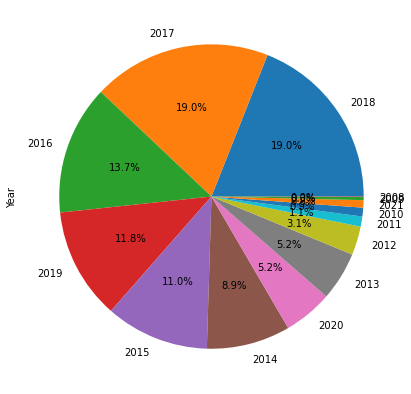

In [54]:
cars['Year'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

Cars from make year 2017 and 2018 make 19% of the data

<AxesSubplot:ylabel='Fuel'>

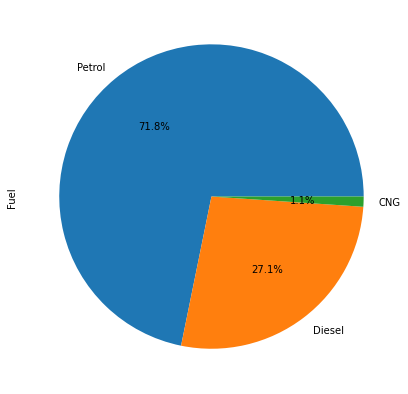

In [55]:
cars['Fuel'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

Data has 71.8% cars which are run on petrol

<AxesSubplot:xlabel='Fuel', ylabel='Price'>

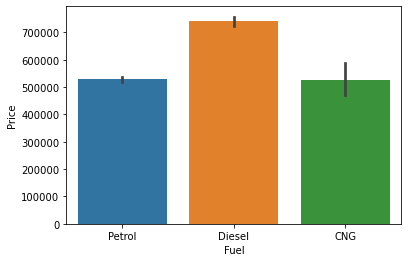

In [56]:
sns.barplot(x='Fuel', y='Price', data = cars)

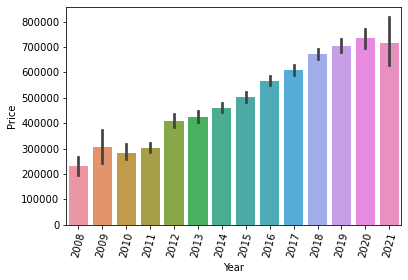

In [57]:
sns.barplot(x='Year', y='Price', data = cars)
plt.xticks(rotation=75)
plt.show()

Price are higher for the newer model

<AxesSubplot:ylabel='Location'>

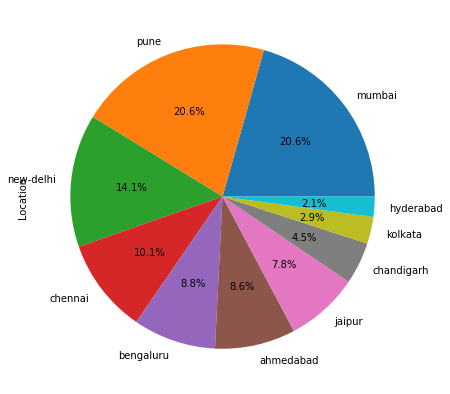

In [58]:
cars['Location'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

More than 60% of the data is from Mumbai and Pune

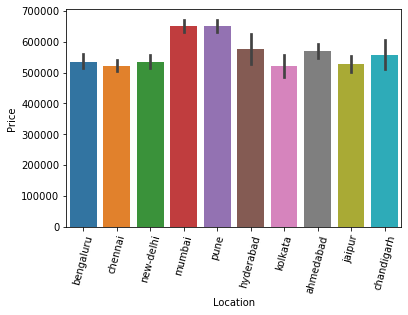

In [60]:
sns.barplot(x='Location', y='Price', data = cars)
plt.xticks(rotation=75)
plt.show()

Price range is lower in Chennai and Kolkata

<AxesSubplot:ylabel='Owners'>

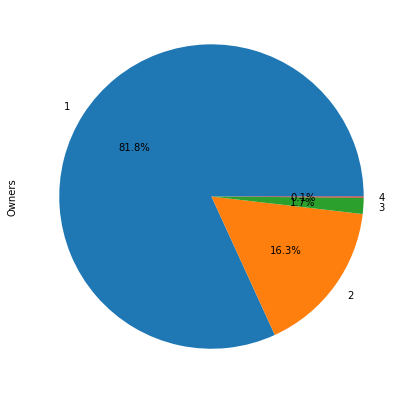

In [61]:
cars['Owners'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

Used cars are mostly preferred if there are less owners

<AxesSubplot:xlabel='Owners', ylabel='Price'>

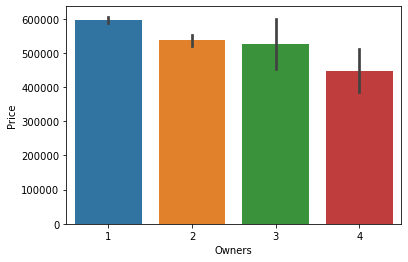

In [62]:
sns.barplot(x='Owners', y='Price', data = cars)

Price is highly corelated with Year

# Feature Engineering

We will check how old the car is by introducing the new column 'Current year'

In [63]:
cars['Current Year']=2022

In [64]:
cars

,Brands,Model,Variant,Year,Fuel,Transmission,kms,Owners,Location,Price,Current Year
0,hyundai,Grand i10,MAGNA 1.2,2014,Petrol,Manual,38708,1,bengaluru,382299,2022
1,hyundai,Elite i20,ASTA 1.4,2016,Diesel,Manual,43221,2,bengaluru,683299,2022
2,hyundai,Elite i20,ASTA 1.2,2015,Petrol,Manual,53045,1,bengaluru,658599,2022
3,hyundai,Creta,1.6 VTVT,2019,Petrol,Automatic,12493,1,bengaluru,1486399,2022
4,hyundai,Elite i20,1.4 CRDI,2017,Diesel,Manual,100703,1,bengaluru,730199,2022
...,...,...,...,...,...,...,...,...,...,...,...
4372,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,34586,1,chandigarh,759899,2022
4373,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,46128,1,chandigarh,821299,2022
4374,ford,FREESTYLE,TITANIUM 1.5,2018,Diesel,Manual,75456,1,chandigarh,548899,2022
4375,ford,Endeavour,2.2l 4X4,2016,Diesel,Manual,45927,1,chandigarh,1961999,2022


In [65]:
#we will subtract current year from the make year to check how old car is
cars['no_year']=cars['Current Year']- cars['Year']

In [66]:
cars

,Brands,Model,Variant,Year,Fuel,Transmission,kms,Owners,Location,Price,Current Year,no_year
0,hyundai,Grand i10,MAGNA 1.2,2014,Petrol,Manual,38708,1,bengaluru,382299,2022,8
1,hyundai,Elite i20,ASTA 1.4,2016,Diesel,Manual,43221,2,bengaluru,683299,2022,6
2,hyundai,Elite i20,ASTA 1.2,2015,Petrol,Manual,53045,1,bengaluru,658599,2022,7
3,hyundai,Creta,1.6 VTVT,2019,Petrol,Automatic,12493,1,bengaluru,1486399,2022,3
4,hyundai,Elite i20,1.4 CRDI,2017,Diesel,Manual,100703,1,bengaluru,730199,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4372,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,34586,1,chandigarh,759899,2022,4
4373,ford,Ecosport,1.5 TREND,2018,Diesel,Manual,46128,1,chandigarh,821299,2022,4
4374,ford,FREESTYLE,TITANIUM 1.5,2018,Diesel,Manual,75456,1,chandigarh,548899,2022,4
4375,ford,Endeavour,2.2l 4X4,2016,Diesel,Manual,45927,1,chandigarh,1961999,2022,6


In [67]:
#since we got the car age we will drop the year and current year column
cars.drop(['Year'],axis=1,inplace=True)
cars.drop(['Current Year'],axis=1,inplace=True)

In [68]:
cars

,Brands,Model,Variant,Fuel,Transmission,kms,Owners,Location,Price,no_year
0,hyundai,Grand i10,MAGNA 1.2,Petrol,Manual,38708,1,bengaluru,382299,8
1,hyundai,Elite i20,ASTA 1.4,Diesel,Manual,43221,2,bengaluru,683299,6
2,hyundai,Elite i20,ASTA 1.2,Petrol,Manual,53045,1,bengaluru,658599,7
3,hyundai,Creta,1.6 VTVT,Petrol,Automatic,12493,1,bengaluru,1486399,3
4,hyundai,Elite i20,1.4 CRDI,Diesel,Manual,100703,1,bengaluru,730199,5
...,...,...,...,...,...,...,...,...,...,...
4372,ford,Ecosport,1.5 TREND,Diesel,Manual,34586,1,chandigarh,759899,4
4373,ford,Ecosport,1.5 TREND,Diesel,Manual,46128,1,chandigarh,821299,4
4374,ford,FREESTYLE,TITANIUM 1.5,Diesel,Manual,75456,1,chandigarh,548899,4
4375,ford,Endeavour,2.2l 4X4,Diesel,Manual,45927,1,chandigarh,1961999,6


In [69]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4195 entries, 0 to 4376
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brands        4195 non-null   object
 1   Model         4195 non-null   object
 2   Variant       4195 non-null   object
 3   Fuel          4195 non-null   object
 4   Transmission  4195 non-null   object
 5   kms           4195 non-null   int32 
 6   Owners        4195 non-null   int64 
 7   Location      4195 non-null   object
 8   Price         4195 non-null   int32 
 9   no_year       4195 non-null   int64 
dtypes: int32(2), int64(2), object(6)
memory usage: 456.8+ KB


In [70]:
#changing the categorical feature to numerical

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cars.columns:
    if cars[i].dtypes==object:
        cars[i]=le.fit_transform(cars[i])

In [71]:
cars

,Brands,Model,Variant,Fuel,Transmission,kms,Owners,Location,Price,no_year
0,3,40,146,2,1,38708,1,1,382299,8
1,3,27,97,1,1,43221,2,1,683299,6
2,3,27,96,2,1,53045,1,1,658599,7
3,3,22,60,2,0,12493,1,1,1486399,3
4,3,27,30,1,1,100703,1,1,730199,5
...,...,...,...,...,...,...,...,...,...,...
4372,1,25,47,1,1,34586,1,2,759899,4
4373,1,25,47,1,1,46128,1,2,821299,4
4374,1,33,208,1,1,75456,1,2,548899,4
4375,1,28,64,1,1,45927,1,2,1961999,6


# We are now going to split the data between input and target variable.

In [72]:
x=cars.drop(['Price'],axis=1)
y=cars['Price']
y=pd.DataFrame(data=y)

In [73]:
x.shape

(4195, 9)

In [74]:
y.shape

(4195, 1)

# Model Fitting and Selection

Importing all the libraries for model fitting and cross validation.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

We will check the best possible random state to train our model. Using LinearRegression to check and then later will run with other models.

In [76]:
MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 125 is 0.47646796609008246


We can see that the best random state is 125. We will split the data with this random state.

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=125)

In [78]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.010154340107286886
-0.04810361690629583
-0.04842915181188623


In [79]:
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,dt,rf,kn,ab,gb,ls,rd]
kf = KFold(n_splits=5, random_state=125, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean()*100)
    
Performance={'Model':['Linear Regression','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,40.807804,47.646797,3.324198e+10,41.989322
1,DecisionTree,100.000000,89.324949,6.778187e+09,86.617553
2,RandomForest,98.957259,93.168128,4.337938e+09,92.064959
3,KNN,35.965456,-10.406163,7.010305e+10,-3.019677
4,AdaBoost,62.669597,56.636443,2.753395e+10,55.275628
5,GradientBoosting,89.754637,87.490368,7.943065e+09,85.304184
6,Lasso,40.807804,47.646840,3.324195e+10,41.989361
7,Ridge,40.807685,47.640097,3.324623e+10,41.990034


In [80]:
Performance['Difference']=Performance['Test Score']-Performance['Cross Validation Score']

In [81]:
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score,Difference
0,Linear Regression,40.807804,47.646797,3.324198e+10,41.989322,5.657474
1,DecisionTree,100.000000,89.324949,6.778187e+09,86.617553,2.707396
2,RandomForest,98.957259,93.168128,4.337938e+09,92.064959,1.103169
3,KNN,35.965456,-10.406163,7.010305e+10,-3.019677,-7.386486
4,AdaBoost,62.669597,56.636443,2.753395e+10,55.275628,1.360816
5,GradientBoosting,89.754637,87.490368,7.943065e+09,85.304184,2.186184
6,Lasso,40.807804,47.646840,3.324195e+10,41.989361,5.657480
7,Ridge,40.807685,47.640097,3.324623e+10,41.990034,5.650064


RandomForest has given us the best test accuracy of 93% with CV score of 92%


We will select this as our final model and Hypertune it

# HyperTuning

In [82]:
#Importing the libraries for Hypertuning.

from sklearn.model_selection import GridSearchCV

In [83]:
parameters1 = {'max_depth': [10, 20, 30, 40, None],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4, 6],
                  'min_samples_split': [2, 5, 10, 15],
                  'n_estimators': [5, 10, 20, 30, 50, 100]}

In [84]:
GCV1=GridSearchCV(RandomForestRegressor(),parameters1,cv=3)
GCV1.fit(x_train,y_train)

print(GCV1.best_params_)

{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


We will now fit thw above parameters with the model.

In [85]:
Finalmod1=RandomForestRegressor(max_depth= 20, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
Finalmod1.fit(x_train,y_train)
pred_test1=Finalmod1.predict(x_test)
RF_R2=r2_score(y_test,pred_test1)
RF_scores=cross_val_score(Finalmod1,x,y,cv=kf)
RF_MSE = mean_squared_error(y_test,pred_test1)
print('RandomForestRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', RF_R2*100)
print('Cross Validation score',RF_scores.mean()*100)
print('Mean Square Error',RF_MSE)

RandomForestRegressor Performance
---------------------------------------------------
Accuracy Score 93.19454200192297
Cross Validation score 91.79633509128851
Mean Square Error 4321165954.459537


Our model performance has increased slightly

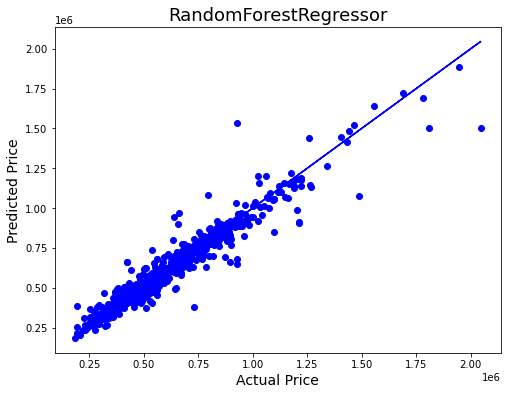

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test1,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

Our model is fitting well.

In [87]:
#there is a slight improve in the accuracy after hypertuning the model
#lets dump the model
import joblib
joblib.dump(Finalmod1,'Car_price.obj')

['Car_price.obj']